<a href="https://colab.research.google.com/github/baijuthomas528/gs-quant/blob/master/Copy_of_Trading_Futures_Options.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Price Trends

In [ ]:
import yfinance as yf
import pandas as pd

def plot_stock_returns(tickers, start_date, end_date):
    # Create a dictionary to hold the results for each ticker
    results_dict = {}

    for ticker in tickers:
        # Download stock data with auto_adjust=False to retain 'Adj Close'
        stock_data = yf.download(ticker, start=start_date, end=end_date, auto_adjust=False)

        # Check if data is available
        if stock_data.empty:
            print(f"No data found for ticker: {ticker}")
            continue  # Skip to the next ticker if no data

        # Get the current price of the ticker
        current_price = float(stock_data['Adj Close'].iloc[-1]) if 'Adj Close' in stock_data.columns else None

        # Calculate daily returns
        stock_data['Daily Return'] = stock_data['Adj Close'].pct_change()

        # Resample to weekly data and calculate weekly returns
        stock_data['Weekly Return'] = stock_data['Adj Close'].resample('W-FRI').ffill().pct_change()

        # Resample to monthly data and calculate monthly returns
        stock_data['Monthly Return'] = stock_data['Adj Close'].resample('M').ffill().pct_change()

        # Filtered Dates Daily VaR (99%)
        var_99_daily_filtered = stock_data['Daily Return'].quantile(0.01)
        var_99_daily_filtered_loss = current_price * abs(var_99_daily_filtered)

        # Calculate the required statistics for daily returns
        max_daily_return = stock_data['Daily Return'].max()
        min_daily_return = stock_data['Daily Return'].min()
        median_daily_return = stock_data['Daily Return'].median()
        avg_daily_return = stock_data['Daily Return'].mean()

        # Find the dates for the max and min daily returns
        max_daily_return_date = stock_data['Daily Return'].idxmax()
        min_daily_return_date = stock_data['Daily Return'].idxmin()

        # Calculate the required statistics for weekly returns
        weekly_data = stock_data['Weekly Return'].dropna()
        max_weekly_return = weekly_data.max()
        min_weekly_return = weekly_data.min()
        median_weekly_return = weekly_data.median()
        avg_weekly_return = weekly_data.mean()

        max_weekly_return_date = weekly_data.idxmax()
        min_weekly_return_date = weekly_data.idxmin()

        price_below_min_weekly = current_price * (1 + min_weekly_return)
        price_above_max_weekly = current_price * (1 + max_weekly_return)

        # Calculate the required statistics for monthly returns
        monthly_data = stock_data['Monthly Return'].dropna()
        max_monthly_return = monthly_data.max()
        min_monthly_return = monthly_data.min()
        median_monthly_return = monthly_data.median()
        avg_monthly_return = monthly_data.mean()

        max_monthly_return_date = monthly_data.idxmax()
        min_monthly_return_date = monthly_data.idxmin()

        price_below_min_monthly = current_price * (1 + min_monthly_return)
        price_above_max_monthly = current_price * (1 + max_monthly_return)

        # Count occurrences of specific thresholds
        daily_1_percent_count = stock_data['Daily Return'].abs().ge(0.01).sum()
        daily_2_percent_count = stock_data['Daily Return'].abs().ge(0.02).sum()
        daily_3_percent_count = stock_data['Daily Return'].abs().ge(0.03).sum()
        daily_4_percent_count = stock_data['Daily Return'].abs().ge(0.04).sum()
        daily_5_percent_count = stock_data['Daily Return'].abs().ge(0.05).sum()
        daily_10_percent_count = stock_data['Daily Return'].abs().ge(0.10).sum()

        weekly_1_percent_count = weekly_data.abs().ge(0.01).sum()
        weekly_2_percent_count = weekly_data.abs().ge(0.02).sum()
        weekly_3_percent_count = weekly_data.abs().ge(0.03).sum()
        weekly_4_percent_count = weekly_data.abs().ge(0.04).sum()
        weekly_5_percent_count = weekly_data.abs().ge(0.05).sum()
        weekly_10_percent_count = weekly_data.abs().ge(0.10).sum()

        monthly_1_percent_count = monthly_data.abs().ge(0.01).sum()
        monthly_2_percent_count = monthly_data.abs().ge(0.02).sum()
        monthly_3_percent_count = monthly_data.abs().ge(0.03).sum()
        monthly_4_percent_count = monthly_data.abs().ge(0.04).sum()
        monthly_5_percent_count = monthly_data.abs().ge(0.05).sum()
        monthly_10_percent_count = monthly_data.abs().ge(0.10).sum()

        # Store all results including Filtered Dates VaR
        results_dict[ticker] = {
            "Current Price": f"{current_price:.2f}",
            "Filtered Dates VaR (99%)": f"{var_99_daily_filtered:.2%}",
            "Filtered Dates VaR (99%) $": f"-{var_99_daily_filtered_loss:.2f}",
            "Max Daily Return": f"{max_daily_return:.5%}",
            "Max Daily Return Date": max_daily_return_date,
            "Min Daily Return": f"{min_daily_return:.5%}",
            "Min Daily Return Date": min_daily_return_date,
            "Median Daily Return": f"{median_daily_return:.5%}",
            "Average Daily Return": f"{avg_daily_return:.5%}",
            "Max Weekly Return": f"{max_weekly_return:.5%}",
            "Max Weekly Return Date": max_weekly_return_date,
            "Min Weekly Return": f"{min_weekly_return:.5%}",
            "Min Weekly Return Date": min_weekly_return_date,
            "Price Above Max Weekly": f"{price_above_max_weekly:.2f}",
            "Price Below Min Weekly": f"{price_below_min_weekly:.2f}",
            "Median Weekly Return": f"{median_weekly_return:.5%}",
            "Average Weekly Return": f"{avg_weekly_return:.5%}",
            "Max Monthly Return": f"{max_monthly_return:.5%}",
            "Max Monthly Return Date": max_monthly_return_date,
            "Min Monthly Return": f"{min_monthly_return:.5%}",
            "Min Monthly Return Date": min_monthly_return_date,
            "Price Above Max Monthly": f"{price_above_max_monthly:.2f}",
            "Price Below Min Monthly": f"{price_below_min_monthly:.2f}",
            "Median Monthly Return": f"{median_monthly_return:.5%}",
            "Average Monthly Return": f"{avg_monthly_return:.5%}",
            "Times Daily Return Tested 1%": daily_1_percent_count,
            "Times Daily Return Tested 2%": daily_2_percent_count,
            "Times Daily Return Tested 3%": daily_3_percent_count,
            "Times Daily Return Tested 4%": daily_4_percent_count,
            "Times Daily Return Tested 5%": daily_5_percent_count,
            "Times Daily Return Tested 10%": daily_10_percent_count,
            "Times Weekly Return Tested 1%": weekly_1_percent_count,
            "Times Weekly Return Tested 2%": weekly_2_percent_count,
            "Times Weekly Return Tested 3%": weekly_3_percent_count,
            "Times Weekly Return Tested 4%": weekly_4_percent_count,
            "Times Weekly Return Tested 5%": weekly_5_percent_count,
            "Times Monthly Return Tested 1%": monthly_1_percent_count,
            "Times Monthly Return Tested 2%": monthly_2_percent_count,
            "Times Monthly Return Tested 3%": monthly_3_percent_count,
            "Times Monthly Return Tested 4%": monthly_4_percent_count,
            "Times Monthly Return Tested 5%": monthly_5_percent_count,
        }

    # Convert the results dictionary to a DataFrame for better readability
    results_df = pd.DataFrame(results_dict)

    print("\n=== Stock Return & Filtered Dates VaR Summary ===")
    print(results_df)

# Example usage:
tickers = ["avgo"]
start_date = "2024-01-01"
end_date = "2025-12-28"

plot_stock_returns(tickers, start_date, end_date)


[*********************100%***********************]  1 of 1 completed


=== Stock Return & Filtered Dates VaR Summary ===
                                               avgo
Current Price                                340.20
Filtered Dates VaR (99%)                     -7.67%
Filtered Dates VaR (99%) $                   -26.11
Max Daily Return                          24.43263%
Max Daily Return Date           2024-12-13 00:00:00
Min Daily Return                         -17.39681%
Min Daily Return Date           2025-01-27 00:00:00
Median Daily Return                        0.14328%
Average Daily Return                       0.29978%
Max Weekly Return                         25.21583%
Max Weekly Return Date          2024-12-13 00:00:00
Min Weekly Return                        -15.85803%
Min Weekly Return Date          2024-09-06 00:00:00
Price Above Max Weekly                       425.98
Price Below Min Weekly                       286.25
Median Weekly Return                       0.89946%
Average Weekly Return                      1.59833%
Max Monthly R


/tmp/ipython-input-1991561371.py:18: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(stock_data['Adj Close'].iloc[-1]) if 'Adj Close' in stock_data.columns else None
/tmp/ipython-input-1991561371.py:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  stock_data['Monthly Return'] = stock_data['Adj Close'].resample('M').ffill().pct_change()


## Daily, Weekly, Monthly Returns



In [ ]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go
from IPython.display import FileLink

def show_stock_moves(
    tickers, start_date, end_date,
    moves='daily', sort='desc',
    export_excel=True, excel_filename="stock_returns.xlsx",
    cumulative_tickers=None
):
    """
    Download stock data and show returns in a grid/table format
    for daily, weekly, or monthly frequency, with sorting and interactive Plotly plotting.
    Adds a separate cumulative return chart for selected tickers (cumulative_tickers).
    """

    valid_moves = ['daily', 'weekly', 'monthly']
    valid_sort = ['asc', 'desc', 'bydate']

    if moves.lower() not in valid_moves:
        raise ValueError(f"`moves` must be one of {valid_moves}")
    if sort.lower() not in valid_sort:
        raise ValueError(f"`sort` must be one of {valid_sort}")

    returns_list, price_list = [], []

    # --- Download and process data for each ticker ---
    for ticker in tickers:
        data = yf.download(ticker, start=start_date, end=end_date, auto_adjust=False, progress=False)
        if data.empty:
            print(f"No data found for {ticker}")
            continue

        adj_close = data['Adj Close']

        # Compute periodic returns and resample prices
        if moves.lower() == 'daily':
            returns = adj_close.pct_change().dropna()
            price = adj_close.reindex(returns.index)
        elif moves.lower() == 'weekly':
            adj_close_resampled = adj_close.resample('W-FRI').ffill()
            returns = adj_close_resampled.pct_change().dropna()
            price = adj_close_resampled.reindex(returns.index)
        elif moves.lower() == 'monthly':
            adj_close_resampled = adj_close.resample('M').ffill()
            returns = adj_close_resampled.pct_change().dropna()
            price = adj_close_resampled.reindex(returns.index)

        returns.name = ticker
        price.name = ticker
        returns_list.append(returns)
        price_list.append(price)

    if not returns_list:
        print("No results to display.")
        return

    result_df = pd.concat(returns_list, axis=1)
    price_df = pd.concat(price_list, axis=1)
    cumret_df = (1 + result_df).cumprod() - 1  # Cumulative return for all tickers

    # --- Sorting ---
    if sort.lower() == 'asc':
        result_df = result_df.sort_values(by=tickers[0], ascending=True)
        price_df = price_df.reindex(result_df.index)
    elif sort.lower() == 'desc':
        result_df = result_df.sort_values(by=tickers[0], ascending=False)
        price_df = price_df.reindex(result_df.index)
    elif sort.lower() == 'bydate':
        result_df = result_df.sort_index(ascending=True)
        price_df = price_df.reindex(result_df.index)

    cumret_df = cumret_df.reindex(result_df.index)

    # --- Print formatted table ---
    formatted_df = result_df.applymap(lambda x: f"{x:.2%}")
    print("\nReturns Table (sorted):\n")
    print(formatted_df)

    # --- Export to Excel (optional) ---
    if export_excel:
        export_df = result_df.copy()
        for ticker in tickers:
            export_df["Cumulative_" + ticker] = cumret_df[ticker]
        export_df.to_excel(excel_filename)
        display(FileLink(excel_filename))

    # --- Plot 1: Returns Chart ---
    fig = go.Figure()

    for ticker in tickers:
        custom_data = pd.DataFrame({
            'Price': price_df[ticker],
            'Ticker': [ticker] * len(price_df)
        })

        fig.add_trace(go.Bar(
            x=result_df.index.strftime('%Y-%m-%d'),
            y=result_df[ticker] * 100,
            customdata=custom_data[['Ticker', 'Price']].values,
            hovertemplate=(
                '<b>Date:</b> %{x}<br>'
                '<b>Ticker:</b> %{customdata[0]}<br>'
                '<b>Return:</b> %{y:.2f}%<br>'
                '<b>Price:</b> $%{customdata[1]:.2f}<extra></extra>'
            ),
            name=f"{ticker} {moves.capitalize()} Return"
        ))

    fig.add_trace(go.Scatter(
        x=result_df.index.strftime('%Y-%m-%d'),
        y=cumret_df[tickers[0]] * 100,
        mode='lines+markers',
        name=f"{tickers[0]} Cumulative Return",
        line=dict(width=2, color='black'),
        hovertemplate='<b>Date:</b> %{x}<br><b>Cumulative:</b> %{y:.2f}%<extra></extra>'
    ))

    fig.update_layout(
        title=f"{', '.join(tickers)} {moves.capitalize()} Returns (sorted: {sort})",
        xaxis_title="Date",
        yaxis_title="Return (%)",
        xaxis_tickangle=-45,
        barmode='group',
        height=600
    )
    fig.show()

    # --- Plot 2: Cumulative Graph (user-selected tickers) ---
    fig.show()

    # --- Plot 2: Cumulative Graph (user-selected tickers) ---
    if cumulative_tickers:
        missing = [t for t in cumulative_tickers if t not in cumret_df.columns]
        if missing:
            print(f"⚠️ Warning: No data found for tickers: {', '.join(missing)}")
        cum_fig = go.Figure()
        for ticker in cumulative_tickers:
            if ticker in cumret_df.columns:
                cum_fig.add_trace(go.Scatter(
                    x=cumret_df.index.strftime('%Y-%m-%d'),
                    y=cumret_df[ticker] * 100,
                    mode='lines+markers',
                    name=f"{ticker} Cumulative Return",
                    hovertemplate=(
                        '<b>Ticker:</b> ' + ticker +
                        '<br><b>Date:</b> %{x}'
                        '<br><b>Cumulative Return:</b> %{y:.2f}%<extra></extra>'
                    )
                ))
        cum_fig.update_layout(
            title=f"Cumulative Graph ({moves.capitalize()}): {', '.join(cumulative_tickers)}",
            xaxis_title="Date",
            yaxis_title="Cumulative Return (%)",
            height=600
        )
        cum_fig.show()
    else:
        print("\nNo cumulative_tickers provided — skipping Cumulative Graph.")




# --- Example usage ---
tickers = ["MSTR", "BTC-USD", "GLXY", "JNJ", "NVDA", "JPM", "AVGO"]
start_date = "2024-12-30"
end_date = "2025-12-28"
moves = 'weekly'  # Options: 'daily', 'weekly', 'monthly'
sort = 'bydate'

# Choose which tickers you want in the cumulative graph
cumulative_tickers = ["MSTR", "BTC-USD", "GLXY", "JNJ", "NVDA", "JPM", "AVGO"]

show_stock_moves(tickers, start_date, end_date, moves, sort, cumulative_tickers=cumulative_tickers)


/tmp/ipython-input-2993398542.py:77: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_df = result_df.applymap(lambda x: f"{x:.2%}")



Returns Table (sorted):

Ticker         MSTR  BTC-USD     GLXY     JNJ     NVDA      JPM     AVGO
Date                                                                    
2025-01-10   -3.46%   -3.47%     nan%  -1.48%   -5.93%   -0.89%   -3.54%
2025-01-17   20.92%   10.31%     nan%   3.50%    1.32%    8.04%    5.85%
2025-01-24  -10.80%    0.34%     nan%  -0.14%    3.57%    2.19%    3.06%
2025-01-31   -5.34%   -2.30%     nan%   3.63%  -15.81%    0.93%   -9.57%
2025-02-07   -2.16%   -5.74%     nan%   0.64%    8.14%    3.18%    1.63%
2025-02-14    3.10%    1.02%     nan%   1.98%    6.94%    0.29%    3.63%
2025-02-21  -11.26%   -1.42%     nan%   4.77%   -3.18%   -4.47%   -6.17%
2025-02-28  -14.77%  -12.23%     nan%   1.68%   -7.07%    0.16%   -8.79%
2025-03-07   12.43%    2.81%     nan%   1.01%   -9.79%   -8.45%   -2.24%
2025-03-14    3.59%   -3.20%     nan%  -2.33%    7.98%   -4.06%    0.30%
2025-03-21    2.19%    0.09%     nan%   0.50%   -3.26%    3.95%   -1.69%
2025-03-28   -4.80%    0.

/content/stock_returns.xlsx

## **PnL calculation with Stress for portfolio of long stocks**

In [ ]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def show_stock_moves(tickers, start_date, end_date, moves='daily', sort='desc', positions=None):
    """
    Show stock returns and PnL with interactive charts:
    - Chart 1:
        * Returns bar per ticker (left axis)
        * Total PnL line (right axis)
    - Chart 2:
        * Period PnL bar (e.g. daily / weekly / monthly)
        * Cumulative PnL line
    """
    valid_moves = ['daily', 'weekly', 'monthly']
    valid_sort = ['asc', 'desc', 'bydate']

    if moves.lower() not in valid_moves:
        raise ValueError(f"`moves` must be one of {valid_moves}")
    if sort.lower() not in valid_sort:
        raise ValueError(f"`sort` must be one of {valid_sort}")

    returns_list = []
    prices_list = []

    for ticker in tickers:
        data = yf.download(ticker, start=start_date, end=end_date, auto_adjust=False)

        if data.empty:
            print(f"No data found for {ticker}")
            continue

        adj_close = data['Adj Close']

        if moves.lower() == 'daily':
            returns = adj_close.pct_change().dropna()
            prices = adj_close.shift(1).dropna()
        elif moves.lower() == 'weekly':
            returns = adj_close.resample('W-FRI').ffill().pct_change().dropna()
            prices = adj_close.resample('W-FRI').ffill().shift(1).dropna()
        elif moves.lower() == 'monthly':
            returns = adj_close.resample('M').ffill().pct_change().dropna()
            prices = adj_close.resample('M').ffill().shift(1).dropna()

        returns.name = ticker
        prices.name = ticker

        returns_list.append(returns)
        prices_list.append(prices)

    if not returns_list:
        print("No results to display.")
        return

    result_df = pd.concat(returns_list, axis=1)
    price_df = pd.concat(prices_list, axis=1)

    # Cumulative return for first ticker (for future use if needed)
    first = tickers[0]
    cumret = (1 + result_df[first]).cumprod() - 1

    # --- PnL calculation per ticker ---
    pnl_df = pd.DataFrame(index=result_df.index)

    if positions:
        for ticker in tickers:
            if ticker in result_df.columns and ticker in positions:
                pnl_df[ticker + ' PnL'] = result_df[ticker] * price_df[ticker] * positions[ticker]
            else:
                pnl_df[ticker + ' PnL'] = 0.0
        pnl_df['Total PnL'] = pnl_df.sum(axis=1)
    else:
        for ticker in tickers:
            pnl_df[ticker + ' PnL'] = 0.0
        pnl_df['Total PnL'] = 0.0

    # --- Combine returns and PnL ---
    full_df = pd.concat([result_df, pnl_df], axis=1)

    # --- Sorting ---
    if sort.lower() == 'asc':
        full_df = full_df.sort_values(by=first, ascending=True)
    elif sort.lower() == 'desc':
        full_df = full_df.sort_values(by=first, ascending=False)
    elif sort.lower() == 'bydate':
        full_df = full_df.sort_index(ascending=True)

    # Reindex cumret and compute cumulative PnL in the same order as full_df
    cumret = cumret.reindex(full_df.index)
    full_df['Cumulative PnL'] = full_df['Total PnL'].cumsum()

    # --- Format for display ---
    display_df = full_df.copy()
    for ticker in tickers:
        display_df[ticker] = display_df[ticker].apply(lambda x: f"{x:.2%}")
        display_df[ticker + ' PnL'] = full_df[ticker + ' PnL'].apply(lambda x: f"${x:,.2f}")
    display_df['Total PnL'] = full_df['Total PnL'].apply(lambda x: f"${x:,.2f}")
    display_df['Cumulative PnL'] = full_df['Cumulative PnL'].apply(lambda x: f"${x:,.2f}")

    print("\nReturns & PnL Table:\n")
    print(display_df)



    # --- Plot 1: Period PnL (bar) + Cumulative PnL (line) ---
    fig_pnl = go.Figure()

    # Period (e.g. daily/weekly/monthly) total PnL as bar
    fig_pnl.add_trace(go.Bar(
        x=full_df.index.strftime('%Y-%m-%d'),
        y=full_df['Total PnL'],
        name='Period PnL',
        hovertemplate='<b>Date:</b> %{x}<br><b>Period PnL:</b> $%{y:,.2f}'
    ))

    # Cumulative PnL as line
    fig_pnl.add_trace(go.Scatter(
        x=full_df.index.strftime('%Y-%m-%d'),
        y=full_df['Cumulative PnL'],
        mode='lines+markers',
        name='Cumulative PnL',
        hovertemplate='<b>Date:</b> %{x}<br><b>Cumulative PnL:</b> $%{y:,.2f}'
    ))

    fig_pnl.update_layout(
        title=f"{moves.capitalize()} Total PnL and Cumulative PnL",
        xaxis_title="Date",
        yaxis_title="PnL ($)",
        height=600,
        xaxis_tickangle=-45,
        legend_title="Legend"
    )

    fig_pnl.show()


# Example usage
tickers = ["MSTR"]
start_date = "2024-01-01"
end_date = "2025-12-28"
moves = 'weekly'   # 'daily', 'weekly', 'monthly'
sort = 'bydate'    # 'asc', 'desc', 'bydate'

positions = {
    "AVGO": 100,
    "JPM": 200,
    "MSTR": 100
}

show_stock_moves(tickers, start_date, end_date, moves, sort, positions)


[*********************100%***********************]  1 of 1 completed


Returns & PnL Table:

               MSTR    MSTR PnL   Total PnL Cumulative PnL
Date                                                      
2024-01-12  -23.06%  $-1,455.50  $-1,455.50     $-1,455.50
2024-01-19   -0.93%     $-45.30     $-45.30     $-1,500.80
2024-01-26    2.81%     $135.00     $135.00     $-1,365.80
2024-02-02    1.13%      $56.00      $56.00     $-1,309.80
2024-02-09   29.24%   $1,462.20   $1,462.20        $152.40
...             ...         ...         ...            ...
2025-10-24   -0.27%     $-79.00     $-79.00     $22,597.20
2025-10-31   -6.77%  $-1,957.00  $-1,957.00     $20,640.20
2025-11-07  -10.23%  $-2,758.00  $-2,758.00     $17,882.20
2025-11-14  -17.43%  $-4,218.00  $-4,218.00     $13,664.20
2025-11-21  -14.64%  $-2,925.00  $-2,925.00     $10,739.20

[98 rows x 4 columns]


## **STRESS CALC FUTURES**

In [ ]:
import numpy as np
import pandas as pd

# ----- Helpers -----
def _parse_csv_list(s):
    return [x.strip() for x in s.split(",") if x.strip()]

def _to_float_list(xs):
    return [float(x) for x in xs]

def _to_int_list(xs):
    return [int(float(x)) for x in xs]

# ----- CME Contract Sizes -----
CONTRACT_SIZES = {
    "CL": 1000,     # Crude Oil (1,000 barrels)
    "ES": 50,       # E-mini S&P 500 ($50 × index)
    "MES": 5,       # Micro E-mini S&P 500 ($5 × index)
    "NG": 10000,    # Natural Gas (10,000 MMBtu)
    "GC": 100,      # Gold (100 troy ounces)
    "SI": 5000,     # Silver (5,000 troy ounces)
    "HG": 25000,    # Copper (25,000 lbs)
    "ZC": 5000,     # Corn (5,000 bushels)
    "ZS": 5000,     # Soybeans (5,000 bushels)
    "ZW": 5000,     # Wheat (5,000 bushels)
}

# ----- Core calc for futures -----
def calculate_futures_pnl_portfolio(tickers, F_list, contracts_list, contract_sizes=None,
                                    percentages=None, show_breakdown=False):
    if percentages is None:
        # Granular small moves 0–5% + wider stress moves
        granular = [i/100 for i in range(0, 6)]             # 0%,1%,2%,3%,4%,5%
        stress   = [-0.20, -0.15, -0.10, -0.08, -0.05,
                     0, 0.05, 0.08, 0.10, 0.15, 0.20]       # stress moves
        percentages = sorted(set(granular + stress))        # merge + remove duplicates

    # Resolve contract sizes
    if contract_sizes is None or len(contract_sizes) == 0:
        resolved_sizes = []
        for tkr in tickers:
            if tkr in CONTRACT_SIZES:
                resolved_sizes.append(CONTRACT_SIZES[tkr])
            else:
                raise ValueError(f"Contract size for {tkr} not found. Please provide it explicitly.")
        contract_sizes = resolved_sizes

    if not (len(tickers) == len(F_list) == len(contracts_list) == len(contract_sizes)):
        raise ValueError("tickers, F_list, contracts_list, and contract_sizes must have the same length.")

    # Initial portfolio value
    initial_values = [F * c * size for F, c, size in zip(F_list, contracts_list, contract_sizes)]
    initial_portfolio_value = sum(initial_values)

    # Consolidated portfolio PnL
    portfolio_rows = []
    for pct in percentages:
        new_values = [(F * (1 + pct)) * c * size
                      for F, c, size in zip(F_list, contracts_list, contract_sizes)]
        new_portfolio_value = sum(new_values)
        pnl = new_portfolio_value - initial_portfolio_value

        portfolio_rows.append({
            "Percentage Change": pct,
            "Portfolio Value (New)": new_portfolio_value,
            "Initial Portfolio Value": initial_portfolio_value,
            "PnL (Portfolio)": pnl
        })

    df_portfolio = pd.DataFrame(portfolio_rows)
    df_portfolio["Percentage Change"] = df_portfolio["Percentage Change"].apply(lambda x: f"{x*100:.0f}%")
    df_portfolio["Portfolio Value (New)"] = df_portfolio["Portfolio Value (New)"].apply(lambda x: f"${x:,.2f}")
    df_portfolio["Initial Portfolio Value"] = df_portfolio["Initial Portfolio Value"].apply(lambda x: f"${x:,.2f}")
    df_portfolio["PnL (Portfolio)"] = df_portfolio["PnL (Portfolio)"].apply(lambda x: f"${x:,.2f}")

    if show_breakdown:
        breakdown_rows = []
        for tkr, F, c, size in zip(tickers, F_list, contracts_list, contract_sizes):
            init_val = F * c * size
            for pct in percentages:
                new_val = (F * (1 + pct)) * c * size
                pnl = new_val - init_val
                breakdown_rows.append({
                    "Ticker": tkr,
                    "Percentage Change": pct,
                    "New Futures Price": F * (1 + pct),
                    "Contracts": c,
                    "Contract Size": size,
                    "Initial Position Value": init_val,
                    "PnL": pnl
                })
        df_breakdown = pd.DataFrame(breakdown_rows)
        df_breakdown["Percentage Change"] = df_breakdown["Percentage Change"].apply(lambda x: f"{x*100:.0f}%")
        df_breakdown["New Futures Price"] = df_breakdown["New Futures Price"].apply(lambda x: f"${x:,.2f}")
        df_breakdown["Initial Position Value"] = df_breakdown["Initial Position Value"].apply(lambda x: f"${x:,.2f}")
        df_breakdown["PnL"] = df_breakdown["PnL"].apply(lambda x: f"${x:,.2f}")
        return df_portfolio, df_breakdown

    return df_portfolio


# ===== Inputs Section =====
tickers_csv       = "MSTR"
F_csv             = "350"       # Futures prices (per unit)
contracts_csv     = "-100"          # Number of contracts (+long, -short)
contract_size_csv = "1"          # Explicit contract sizes (optional)

# Parse inputs
tickers        = _parse_csv_list(tickers_csv)
F_list         = _to_float_list(_parse_csv_list(F_csv))
contracts_list = _to_int_list(_parse_csv_list(contracts_csv))
contract_sizes = _to_int_list(_parse_csv_list(contract_size_csv)) if contract_size_csv.strip() else None

# Run
df_port, df_break = calculate_futures_pnl_portfolio(tickers, F_list, contracts_list,
                                                    contract_sizes=contract_sizes,
                                                    show_breakdown=True)

print(f"Tickers: {', '.join(tickers)}")
print("Consolidated Futures Portfolio PnL for 0–5% granular moves and wider -20% to +20% stress moves:")
print(df_port.to_string(index=False))

print("\nPer-Ticker Breakdown:")
print(df_break.to_string(index=False))


Tickers: MSTR
Consolidated Futures Portfolio PnL for 0–5% granular moves and wider -20% to +20% stress moves:
Percentage Change Portfolio Value (New) Initial Portfolio Value PnL (Portfolio)
             -20%           $-28,000.00             $-35,000.00       $7,000.00
             -15%           $-29,750.00             $-35,000.00       $5,250.00
             -10%           $-31,500.00             $-35,000.00       $3,500.00
              -8%           $-32,200.00             $-35,000.00       $2,800.00
              -5%           $-33,250.00             $-35,000.00       $1,750.00
               0%           $-35,000.00             $-35,000.00           $0.00
               1%           $-35,350.00             $-35,000.00        $-350.00
               2%           $-35,700.00             $-35,000.00        $-700.00
               3%           $-36,050.00             $-35,000.00      $-1,050.00
               4%           $-36,400.00             $-35,000.00      $-1,400.00
          

##**A)STRESS Wheel strategy , note the margins maintainence drops as the price drops and the unrealised losses increae. however, as long as the positions are open and cash secured , you can wait out the recovery without being margin called or liquidated. only cost is the margin loan rates on this strat.**

In [ ]:
import numpy as np
import pandas as pd

# ----- Helpers -----
def _parse_csv_list(s):
    return [x.strip() for x in s.split(",") if x.strip()]

def _to_float_list(xs):
    return [float(x) for x in xs]

def _to_int_list(xs):
    return [int(float(x)) for x in xs]

# ----- Core Simulation (IBKR-style with margin interest) -----
def simulate_margin_safety_with_assignment(
    tickers,
    S_list,
    lots_list,
    maint_margin_rates,
    cash_available,
    percentages=None,
    regt_initial_long_stock=0.50,   # Reg T initial margin for long stock (50%)
    margin_interest_rate=0.045,     # Annual margin rate (e.g., 4.5%)
    format_currency=True
):
    """
    Simulates assignment financed with cash + margin loan under Reg T,
    including margin interest impact.

    Equity = Market Value - Margin Loan - Accrued Interest + Cash Remaining
    """

    if percentages is None:
        percentages = np.round(np.arange(-0.50, 0.21, 0.01), 4)

    if not (len(tickers) == len(S_list) == len(lots_list) == len(maint_margin_rates)):
        raise ValueError("tickers, S_list, lots_list, and maint_margin_rates must all have same length.")

    # ----- Initial Cost & Reg T Buying Power -----
    initial_portfolio_value = sum(S * q for S, q in zip(S_list, lots_list))

    max_margin_loan = cash_available
    total_funding_power = cash_available + max_margin_loan

    if initial_portfolio_value > total_funding_power:
        print(f"\n❌ ERROR: Assignment requires ${initial_portfolio_value:,.2f}, "
              f"but max funds (cash + margin) = ${total_funding_power:,.2f}.")
        print("🚨 This assignment would IMMEDIATELY violate Reg T and should be rejected or liquidated.\n")
        return pd.DataFrame(), -1

    # ----- Compute Cash/Loan Split at Entry -----
    if initial_portfolio_value <= cash_available:
        margin_loan = 0.0
        cash_remaining = cash_available - initial_portfolio_value
    else:
        margin_loan = initial_portfolio_value - cash_available
        margin_loan = min(margin_loan, max_margin_loan)
        cash_remaining = 0.0

    # ----- Reg T Initial Margin Check -----
    initial_equity = initial_portfolio_value - margin_loan + cash_remaining
    initial_regt_required = regt_initial_long_stock * initial_portfolio_value
    if initial_equity + 1e-8 < initial_regt_required:
        print(f"\n🚨 Reg T violation: Equity ${initial_equity:,.2f} "
              f"< Initial Reg T Required ${initial_regt_required:,.2f}.")
        return pd.DataFrame(), -1

    # ----- Scenario Loop -----
    rows = []
    trigger_price_pct = None

    # Daily interest accrual (assuming 360-day convention)
    daily_interest = margin_loan * margin_interest_rate / 360.0

    for pct in percentages:
        new_prices = [S * (1 + pct) for S in S_list]
        new_values = [p * q for p, q in zip(new_prices, lots_list)]
        new_portfolio_value = sum(new_values)

        new_maint_margin = sum(p * q * m for p, q, m in zip(new_prices, lots_list, maint_margin_rates))

        # Equity now reduced by daily interest accrual
        equity = new_portfolio_value - margin_loan - daily_interest + cash_remaining
        excess_liquidity = equity - new_maint_margin

        unrealized_pnl = new_portfolio_value - initial_portfolio_value
        ltv = margin_loan / new_portfolio_value if new_portfolio_value > 0 else np.nan

        margin_call = excess_liquidity < 0
        if margin_call and trigger_price_pct is None:
            trigger_price_pct = pct

        rows.append({
            "Pct Move": f"{pct*100:.0f}%",
            "New Prices": ", ".join([f"{price:.2f}" for price in new_prices]),
            "New Portfolio Value": new_portfolio_value,
            "Unrealized PnL": unrealized_pnl,
            "Cash Balance": cash_available,
            "Cash Remaining": cash_remaining,
            "Margin Loan": margin_loan,
            "Daily Interest": daily_interest,
            "Loan-to-Value (LTV)": ltv,
            "Equity (after Interest)": equity,
            "Maint. Margin Required": new_maint_margin,
            "Excess Liquidity": excess_liquidity,
            "Margin Call?": "YES" if margin_call else "NO"
        })

    df = pd.DataFrame(rows)

    # ----- Format -----
    if format_currency:
        currency_cols = [
            "New Portfolio Value", "Unrealized PnL", "Cash Balance", "Cash Remaining",
            "Margin Loan", "Daily Interest", "Equity (after Interest)",
            "Maint. Margin Required", "Excess Liquidity"
        ]
        for col in currency_cols:
            df[col] = df[col].apply(lambda x: f"${x:,.2f}")
        df["Loan-to-Value (LTV)"] = df["Loan-to-Value (LTV)"].apply(
            lambda x: f"{x*100:.1f}%" if pd.notnull(x) else "n/a"
        )

    return df, trigger_price_pct


# ===== Example Usage =====
if __name__ == "__main__":
    tickers_csv = "NVDA, NVDA, MSTR, AVGO"
    S_csv = "195, 200, 350, 370"
    lots_csv = "200, 200, 100, 200 "
    maint_margin_rates_csv = "0.30, 0.30, 0.60, 0.30"
    cash_available = 95000.91

    tickers = _parse_csv_list(tickers_csv)
    S_list = _to_float_list(_parse_csv_list(S_csv))
    lots_list = _to_int_list(_parse_csv_list(lots_csv))
    maint_margin_rates = _to_float_list(_parse_csv_list(maint_margin_rates_csv))

    df_margin_calc, trigger_pct = simulate_margin_safety_with_assignment(
        tickers, S_list, lots_list, maint_margin_rates, cash_available,
        margin_interest_rate=0.045   # 4.5% annual
    )

    if not df_margin_calc.empty:
        print("\n📊 Margin Safety Simulation (with Daily Interest @ 4.5%):\n")
        print(df_margin_calc.to_string(index=False))

        if trigger_pct is not None:
            print(f"\n🚨 Margin call triggers at ≈ {trigger_pct*100:.1f}% move from entry.\n")
        else:
            print("\n✅ No margin call triggered in simulated price range.\n")



📊 Margin Safety Simulation (with Daily Interest @ 4.5%):

Pct Move                     New Prices New Portfolio Value Unrealized PnL Cash Balance Cash Remaining Margin Loan Daily Interest Loan-to-Value (LTV) Equity (after Interest) Maint. Margin Required Excess Liquidity Margin Call?
    -50%  97.50, 100.00, 175.00, 185.00          $94,000.00    $-94,000.00   $95,000.91          $0.00  $92,999.09         $11.62               98.9%                 $989.29             $33,450.00      $-32,460.71          YES
    -49%  99.45, 102.00, 178.50, 188.70          $95,880.00    $-92,120.00   $95,000.91          $0.00  $92,999.09         $11.62               97.0%               $2,869.29             $34,119.00      $-31,249.71          YES
    -48% 101.40, 104.00, 182.00, 192.40          $97,760.00    $-90,240.00   $95,000.91          $0.00  $92,999.09         $11.62               95.1%               $4,749.29             $34,788.00      $-30,038.71          YES
    -47% 103.35, 106.00, 185.50, 

##**B)stress tests considers the current prices in the market and adjusts the 0 % Shock - Equity (after Interest)  column by the PnL between my strikes and the current price and then shows how much more shock my account can withstand before a margin call**


In [3]:
import numpy as np
import pandas as pd
import yfinance as yf

# ----- Helpers -----
def _parse_csv_list(s):
    return [x.strip() for x in s.split(",") if x.strip()]

def _to_float_list(xs):
    return [float(x) for x in xs]

def _to_int_list(xs):
    return [int(float(x)) for x in xs]

def get_current_prices_from_yahoo(tickers):
    """
    Fetches latest close prices from Yahoo Finance for each ticker in order.
    """
    prices = []
    for t in tickers:
        hist = yf.Ticker(t).history(period="1d")
        if hist.empty:
            raise ValueError(f"No price data returned for {t}")
        price = float(hist["Close"].iloc[-1])
        prices.append(price)
    return prices

# ----- Core Simulation (IBKR-style with margin interest) -----
def simulate_margin_safety_with_assignment(
    tickers,
    S_list,                 # base prices for shocks (CURRENT prices)
    lots_list,
    maint_margin_rates,
    cash_available,
    entry_prices_for_loan=None,     # NEW: entry/strike prices used to size the margin loan
    percentages=None,
    regt_initial_long_stock=0.50,   # Reg T initial margin for long stock (50%)
    margin_interest_rate=0.045,     # Annual margin rate (e.g., 4.5%)
    format_currency=True
):
    """
    Simulates assignment financed with cash + margin loan under Reg T,
    including margin interest impact.

    IMPORTANT:
    - entry_prices_for_loan = prices at assignment (e.g. strikes / fills)
    - S_list = CURRENT prices from which shocks are applied

    Equity = Market Value - Margin Loan - Accrued Interest + Cash Remaining

    At 0% shock:
        - Market Value = current portfolio value
        - Margin Loan = sized from entry prices
        -> Equity is already reduced by CURRENT PnL vs entry.
    """

    if percentages is None:
        percentages = np.round(np.arange(-0.50, 0.21, 0.01), 4)

    if entry_prices_for_loan is None:
        # Fallback: behave like old version (loan sized off S_list)
        entry_prices_for_loan = S_list

    if not (
        len(tickers) == len(S_list) == len(lots_list) == len(maint_margin_rates) == len(entry_prices_for_loan)
    ):
        raise ValueError("tickers, S_list, lots_list, maint_margin_rates, and entry_prices_for_loan must all have same length.")

    # ----- Initial Cost at ASSIGNMENT (for loan sizing) -----
    assignment_portfolio_value = sum(E * q for E, q in zip(entry_prices_for_loan, lots_list))

    # Simple model: you can borrow up to your cash_available (Reg T 50%)
    max_margin_loan = cash_available
    total_funding_power = cash_available + max_margin_loan

    # NOTE: We *warn* but DO NOT return early anymore
    if assignment_portfolio_value > total_funding_power:
        print(f"\n❌ ERROR: Assignment requires ${assignment_portfolio_value:,.2f}, "
              f"but max funds (cash + margin) = ${total_funding_power:,.2f}.")
        print("🚨 This assignment would IMMEDIATELY violate Reg T and should be rejected or liquidated.\n")
        # No early return – continue to compute PnLs anyway

    # ----- Compute Cash/Loan Split at Entry -----
    if assignment_portfolio_value <= cash_available:
        margin_loan = 0.0
        cash_remaining = cash_available - assignment_portfolio_value
    else:
        margin_loan = assignment_portfolio_value - cash_available
        margin_loan = min(margin_loan, max_margin_loan)
        cash_remaining = 0.0

    # ----- Reg T Initial Margin Check at ASSIGNMENT -----
    initial_equity_at_assignment = assignment_portfolio_value - margin_loan + cash_remaining
    initial_regt_required = regt_initial_long_stock * assignment_portfolio_value

    # Again: print warning but DO NOT return early
    if initial_equity_at_assignment + 1e-8 < initial_regt_required:
        print(f"\n🚨 Reg T violation at assignment: Equity ${initial_equity_at_assignment:,.2f} "
              f"< Initial Reg T Required ${initial_regt_required:,.2f}.")
        print("⚠️ Continuing to run scenarios and PnL calculations anyway for analysis purposes.\n")
        # No early return – proceed with scenario loop

    # ----- Scenario Loop (from CURRENT prices) -----
    rows = []
    trigger_price_pct = None

    # Daily interest accrual (assuming 360-day convention)
    daily_interest = margin_loan * margin_interest_rate / 360.0

    # Current portfolio value (base for scenario PnL)
    current_portfolio_value = sum(S * q for S, q in zip(S_list, lots_list))

    for pct in percentages:
        new_prices = [S * (1 + pct) for S in S_list]
        new_values = [p * q for p, q in zip(new_prices, lots_list)]
        new_portfolio_value = sum(new_values)

        new_maint_margin = sum(p * q * m for p, q, m in zip(new_prices, lots_list, maint_margin_rates))

        # Equity now reduced by daily interest accrual
        equity = new_portfolio_value - margin_loan - daily_interest + cash_remaining
        excess_liquidity = equity - new_maint_margin

        # Scenario PnL vs CURRENT prices (0% -> 0 PnL)
        unrealized_pnl_vs_current = new_portfolio_value - current_portfolio_value

        # Loan-to-value
        ltv = margin_loan / new_portfolio_value if new_portfolio_value > 0 else np.nan

        margin_call = excess_liquidity < 0
        if margin_call and trigger_price_pct is None:
            trigger_price_pct = pct

        rows.append({
            "Pct Move": f"{pct*100:.0f}%",
            "New Prices": ", ".join([f"{price:.2f}" for price in new_prices]),
            "New Portfolio Value": new_portfolio_value,
            "Unrealized PnL vs CURRENT": unrealized_pnl_vs_current,
            "Cash Balance": cash_available,
            "Cash Remaining": cash_remaining,
            "Margin Loan": margin_loan,
            "Daily Interest": daily_interest,
            "Loan-to-Value (LTV)": ltv,
            "Equity (after Interest)": equity,
            "Maint. Margin Required": new_maint_margin,
            "Excess Liquidity": excess_liquidity,
            "Margin Call?": "YES" if margin_call else "NO"
        })

    df = pd.DataFrame(rows)

    # ----- Format -----
    if format_currency:
        currency_cols = [
            "New Portfolio Value", "Unrealized PnL vs CURRENT", "Cash Balance", "Cash Remaining",
            "Margin Loan", "Daily Interest", "Equity (after Interest)",
            "Maint. Margin Required", "Excess Liquidity"
        ]
        for col in currency_cols:
            df[col] = df[col].apply(lambda x: f"${x:,.2f}")
        df["Loan-to-Value (LTV)"] = df["Loan-to-Value (LTV)"].apply(
            lambda x: f"{x*100:.1f}%" if pd.notnull(x) else "n/a"
        )

    return df, trigger_price_pct


def compute_pnl_vs_strikes(tickers, strikes, lots_list, current_prices):
    """
    Computes PnL vs given strikes/cost basis using current prices.
    """
    rows = []
    total_pnl = 0.0

    for t, K, q, S in zip(tickers, strikes, lots_list, current_prices):
        diff = S - K
        pnl = diff * q
        pct_diff = diff / K
        total_pnl += pnl

        rows.append({
            "Ticker": t,
            "Strike/Cost Basis": K,
            "Quantity": q,
            "Current Price": S,
            "Price vs Strike": diff,
            "Distance (%)": pct_diff * 100,
            "Position PnL": pnl
        })

    df = pd.DataFrame(rows)
    return df, total_pnl


# ===== Example Usage =====
if __name__ == "__main__":
    # Positions
    tickers_csv = "NVDA, NVDA, MSTR, AVGO"
    strikes_csv = "195, 200, 350, 370"   # STRIKES / ENTRY PRICES
    lots_csv = "200, 200, 100, 200"
    maint_margin_rates_csv = "0.30, 0.30, 0.60, 0.30"
    cash_available = 80000.91

    tickers = _parse_csv_list(tickers_csv)
    strikes_list = _to_float_list(_parse_csv_list(strikes_csv))
    lots_list = _to_int_list(_parse_csv_list(lots_csv))
    maint_margin_rates = _to_float_list(_parse_csv_list(maint_margin_rates_csv))

    # 1) Get current prices from Yahoo
    current_prices = get_current_prices_from_yahoo(tickers)

    # 2) Compute PnL vs strikes
    df_pnl, total_pnl = compute_pnl_vs_strikes(
        tickers, strikes_list, lots_list, current_prices
    )

    print("\n💰 PnL vs Strikes (using CURRENT Yahoo prices):\n")
    df_display = df_pnl.copy()
    df_display["Strike/Cost Basis"] = df_display["Strike/Cost Basis"].map(lambda x: f"${x:,.2f}")
    df_display["Current Price"] = df_display["Current Price"].map(lambda x: f"${x:,.2f}")
    df_display["Price vs Strike"] = df_display["Price vs Strike"].map(lambda x: f"${x:,.2f}")
    df_display["Distance (%)"] = df_display["Distance (%)"].map(lambda x: f"{x:.2f}%")
    df_display["Position PnL"] = df_display["Position PnL"].map(lambda x: f"${x:,.2f}")

    print(df_display.to_string(index=False))
    print(f"\n🔢 Total Portfolio PnL vs Strikes: ${total_pnl:,.2f}\n")

    # 3) Run margin safety simulation:
    #    - Shocks from CURRENT prices
    #    - Margin loan sized from STRIKES (entry prices)
    df_margin_calc, trigger_pct = simulate_margin_safety_with_assignment(
        tickers,
        S_list=current_prices,          # shocks from CURRENT
        lots_list=lots_list,
        maint_margin_rates=maint_margin_rates,
        cash_available=cash_available,
        margin_interest_rate=0.045,     # 4.5% annual
        entry_prices_for_loan=strikes_list
    )

    if not df_margin_calc.empty:
        print("\n📊 Margin Safety Simulation (with Daily Interest @ 4.5% based on CURRENT prices):\n")
        print(df_margin_calc.to_string(index=False))

        if trigger_pct is not None:
            print(f"\n🚨 Margin call triggers at ≈ {trigger_pct*100:.1f}% move from CURRENT prices.\n")
        else:
            print("\n✅ No margin call triggered in simulated price range.\n")
    else:
        print("\nNo margin table produced.\n")



💰 PnL vs Strikes (using CURRENT Yahoo prices):

Ticker Strike/Cost Basis  Quantity Current Price Price vs Strike Distance (%) Position PnL
  NVDA           $195.00       200       $178.88         $-16.12       -8.27%   $-3,224.00
  NVDA           $200.00       200       $178.88         $-21.12      -10.56%   $-4,224.00
  MSTR           $350.00       100       $170.50        $-179.50      -51.29%  $-17,950.00
  AVGO           $370.00       200       $340.20         $-29.80       -8.05%   $-5,960.00

🔢 Total Portfolio PnL vs Strikes: $-31,358.00


❌ ERROR: Assignment requires $188,000.00, but max funds (cash + margin) = $160,001.82.
🚨 This assignment would IMMEDIATELY violate Reg T and should be rejected or liquidated.


📊 Margin Safety Simulation (with Daily Interest @ 4.5% based on CURRENT prices):

Pct Move                     New Prices New Portfolio Value Unrealized PnL vs CURRENT Cash Balance Cash Remaining Margin Loan Daily Interest Loan-to-Value (LTV) Equity (after Interest) Mai

##**Seasonality per Ticker**

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf

def seasonality_grid(ticker, start_date, end_date):
    # Download historical data for the given ticker
    data = yf.download(ticker, start=start_date, end=end_date)

    # Calculate monthly returns
    data['Monthly Return'] = data['Close'].resample('M').ffill().pct_change() * 100

    # Identify the last valid index before applying backward fill
    last_valid_idx = data['Monthly Return'].last_valid_index()

    # Apply backward fill only up to the last valid date
    data.loc[:last_valid_idx, 'Monthly Return'] = data.loc[:last_valid_idx, 'Monthly Return'].fillna(method='bfill')

    # Group data by year and month
    data['Year'] = data.index.year
    data['Month'] = data.index.strftime('%b')

    # Pivot the data to create a grid with years as rows and months as columns
    df = data.pivot_table(index='Year', columns='Month', values='Monthly Return', aggfunc='mean')

    # Get the actual month abbreviations from the DataFrame columns
    months_order = df.columns.tolist()

    # Reorder the columns (if necessary) - This step might be redundant
    # df = df[months_order]

    # Add Average, Median, High, and Low
    df.loc['Average'] = df.mean()
    df.loc['Median'] = df.median()
    df.loc['High'] = df.max()
    df.loc['Low'] = df.min()

    # Display the DataFrame
    # Round to 2 decimal places
    df = df.round(2)

    # Display the DataFrame
    print(df)

# Example usage:
ticker = 'SPY'
start_date = '2008-01-01'
end_date = '2025-12-31'

seasonality_grid(ticker, start_date, end_date)

/tmp/ipython-input-2857258553.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Ticker                                                                   \
Month      Apr   Aug   Dec    Feb   Jan   Jul   Jun    Mar   May    Nov   
Year                                                                      
2008      4.77 -9.42  0.98  -2.58 -2.58 -0.90 -8.36  -0.89 -8.36   0.98   
2009      9.93  3.69  1.91   8.33  8.33  7.46 -0.07   8.33 -0.07   6.16   
2010      1.55 -4.50  6.69   6.09  6.09 -4.50 -5.17   6.09 -5.17   0.00   
2011     -1.12 -5.50  4.64   3.47  2.33 -5.50 -1.69   0.01 -1.12  -0.41   
2012     -0.67  2.51  0.89   4.34  4.64  1.18  1.18  -0.67 -6.01   0.57   
2013      1.92  3.16  2.59   1.28  5.12  5.17  5.17   1.92  2.36   2.59   
2014      0.70 -1.38 -0.25   4.55 -3.52 -1.34  2.06   0.83  2.06  -0.25   
2015      0.98 -6.10 -1.73  -1.57 -1.57  2.26 -2.03  -1.57 -2.03   0.37   
2016      1.70  0.12  1.79  -0.08 -0.08  0.12  0.35   6.73  1.70   3.68   
2017      1.41  0.29  5.64   3.93  1.79  2.06  0.64   0.13  1.41   3.06   
2018      0.52  3.19 -8.8


/tmp/ipython-input-2857258553.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data['Monthly Return'] = data['Close'].resample('M').ffill().pct_change() * 100
/tmp/ipython-input-2857258553.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.loc[:last_valid_idx, 'Monthly Return'] = data.loc[:last_valid_idx, 'Monthly Return'].fillna(method='bfill')
/tmp/ipython-input-2857258553.py:23: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = data.pivot_table(index='Year', columns='Month', values='Monthly Return', aggfunc='mean')


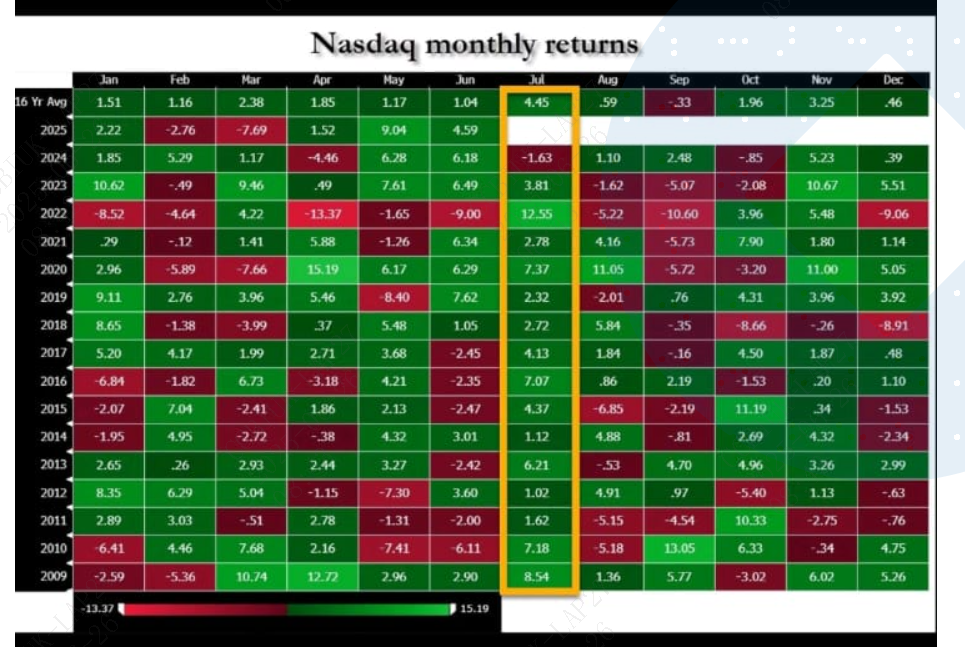

##**Correlation values range from -1 to 1: +1: Perfect positive correlation (they move exactly together). 0: No correlation (independent movement). -1: Perfect negative correlation (they move exactly opposite).**

[*********************100%***********************]  8 of 8 completed
/tmp/ipython-input-1610135168.py:20: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.pct_change().dropna()


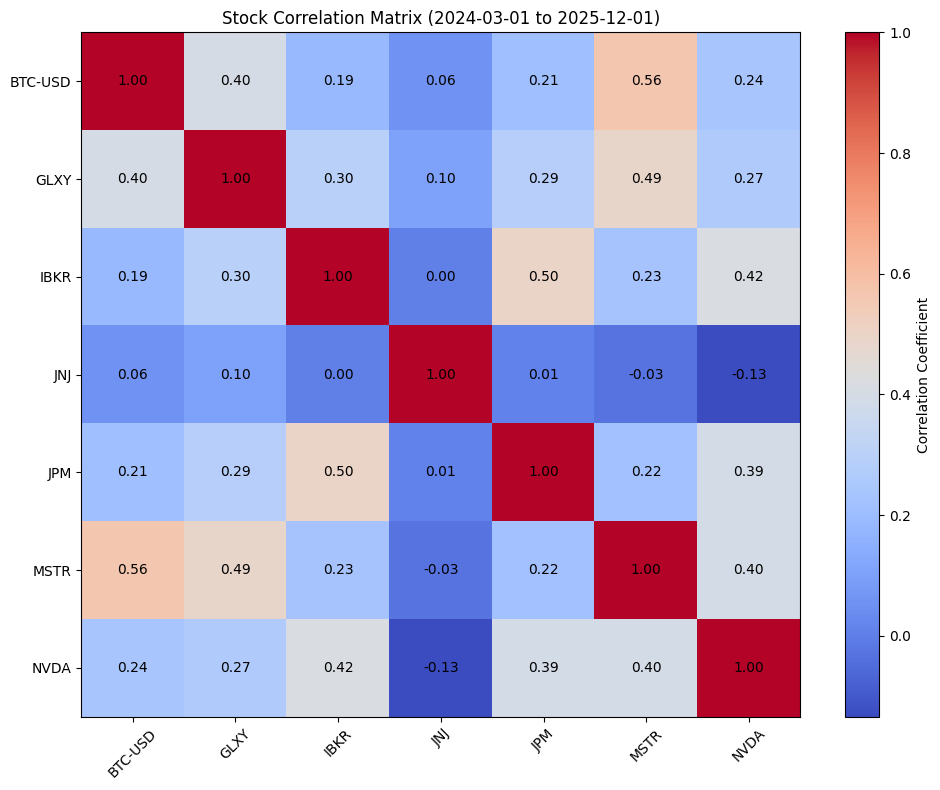


=== Correlation Matrix ===
Ticker    BTC-USD      GLXY      IBKR       JNJ       JPM      MSTR      NVDA
Ticker                                                                       
BTC-USD  1.000000  0.398723  0.185807  0.058130  0.213390  0.562507  0.240292
GLXY     0.398723  1.000000  0.298807  0.103457  0.285389  0.487971  0.268134
IBKR     0.185807  0.298807  1.000000  0.003217  0.498859  0.229237  0.418241
JNJ      0.058130  0.103457  0.003217  1.000000  0.011876 -0.028769 -0.134216
JPM      0.213390  0.285389  0.498859  0.011876  1.000000  0.220426  0.393212
MSTR     0.562507  0.487971  0.229237 -0.028769  0.220426  1.000000  0.395912
NVDA     0.240292  0.268134  0.418241 -0.134216  0.393212  0.395912  1.000000

Calculating Idiosyncratic Risk (1 - R²) vs SPY

=== Idiosyncratic Risk and Beta ===

β (Beta) measures how much an asset moves with the market (SPY):
    β > 1 → more volatile than SPY
    β < 1 → less volatile than SPY
    β ≈ 0 → uncorrelated with SPY

Idiosyncratic 

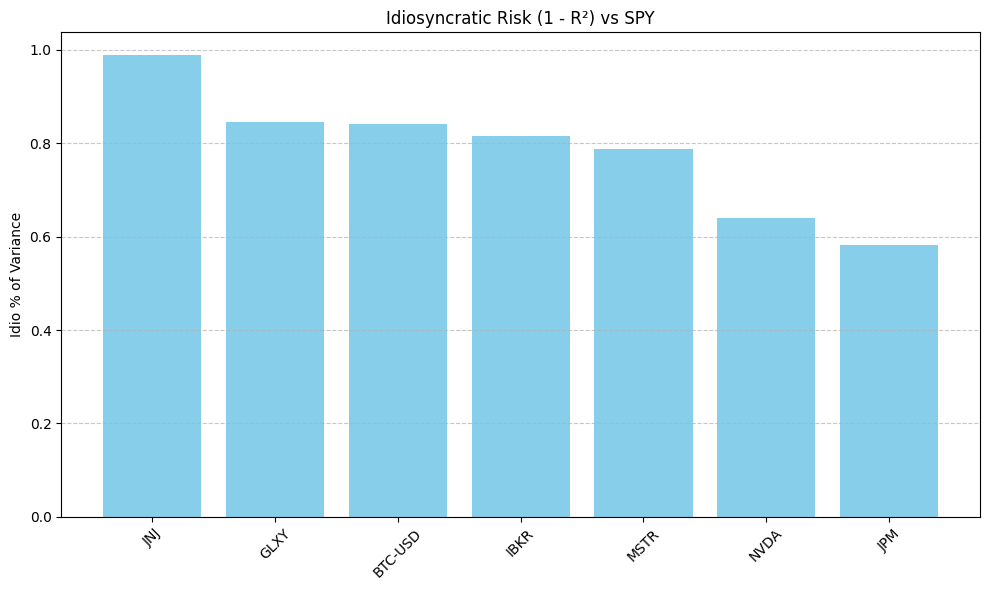

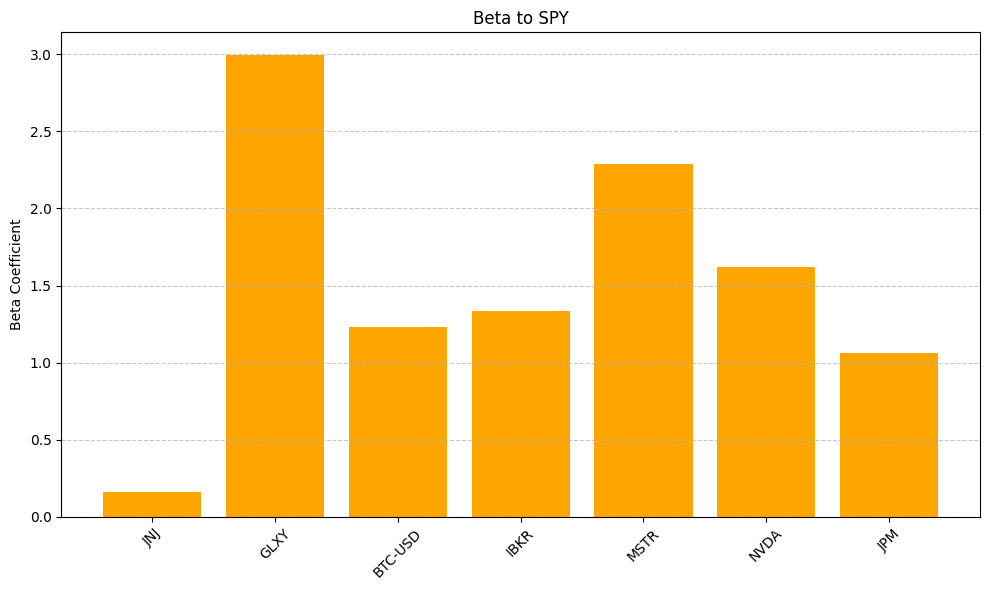

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# === USER INPUTS ===
tickers = ['JPM', 'NVDA', 'JNJ', 'MSTR', 'GLXY', 'BTC-USD','IBKR']  # Your tickers
##tickers = ['XLK', 'XLF', 'XLU', 'XLI', 'XLV', 'XLE', 'XLB', 'XLC', 'XLRE', 'BTC-USD']  # Your tickers
benchmark_ticker = 'SPY'   # Choose any benchmark here (e.g. SPY, QQQ, BTC-USD)
start_date = "2024-03-01"
end_date = "2025-12-01"

# === FETCH DATA ===
print("Downloading data...")
all_tickers = tickers + [benchmark_ticker]
data = yf.download(all_tickers, start=start_date, end=end_date, auto_adjust=False)['Adj Close']

# === CALCULATE RETURNS ===
returns = data.pct_change().dropna()
benchmark_returns = returns[benchmark_ticker]
asset_returns = returns.drop(columns=[benchmark_ticker])

# === CORRELATION MATRIX ===
correlation_matrix = asset_returns.corr()

# === PLOT CORRELATION MATRIX ===
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar(label="Correlation Coefficient")

# Annotate heatmap
for (i, j), val in np.ndenumerate(correlation_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title(f"Stock Correlation Matrix ({start_date} to {end_date})")
plt.tight_layout()
plt.show()

print("\n=== Correlation Matrix ===")
print(correlation_matrix)

# === IDIOSYNCRATIC RISK (1 - R²) CALCULATION ===
print("\nCalculating Idiosyncratic Risk (1 - R²) vs", benchmark_ticker)
idio_results = {}

for ticker in asset_returns.columns:
    y = asset_returns[ticker]
    X = sm.add_constant(benchmark_returns)
    model = sm.OLS(y, X).fit()
    r_squared = model.rsquared
    idio_ratio = 1 - r_squared
    beta = model.params[benchmark_ticker]
    idio_results[ticker] = {"Idio_%": idio_ratio, "Beta": beta}

# Convert results to DataFrame
idio_df = pd.DataFrame(idio_results).T
idio_df = idio_df.sort_values('Idio_%', ascending=False)

print("""
=== Idiosyncratic Risk and Beta ===

β (Beta) measures how much an asset moves with the market (SPY):
    β > 1 → more volatile than SPY
    β < 1 → less volatile than SPY
    β ≈ 0 → uncorrelated with SPY

Idiosyncratic Risk (Idio_%) measures how much of an asset’s total risk
is *not explained* by SPY (i.e., stock- or asset-specific volatility):
    Idio_% = (1 - R²) from regression vs SPY
    Higher Idio_% → more idiosyncratic / company-specific
    Lower Idio_% → more market-driven

=== In Millennium Terms ===
High Idio_%  → you’re adding diversifying alpha ✅
Low Beta     → you’re hedged and uncorrelated ✅
High Beta + Low Idio_% → you’re basically an index tracker ❌
Low Idio_% + High R²   → your returns are market-driven, not unique ❌
""")

print(idio_df)


# === PLOT IDIO RISK ===
plt.figure(figsize=(10, 6))
plt.bar(idio_df.index, idio_df['Idio_%'], color='skyblue')
plt.title(f"Idiosyncratic Risk (1 - R²) vs {benchmark_ticker}")
plt.ylabel("Idio % of Variance")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# === OPTIONAL: PLOT BETA ===
plt.figure(figsize=(10, 6))
plt.bar(idio_df.index, idio_df['Beta'], color='orange')
plt.title(f"Beta to {benchmark_ticker}")
plt.ylabel("Beta Coefficient")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##**Turtle trading ATR **

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime

# ----------------------------------------------------------
# 1. Paste your tickers here (from the image list)
# ----------------------------------------------------------
tickers = ["GLTO","ZNB"]


# ----------------------------------------------------------
# 2. Helper functions
# ----------------------------------------------------------
def calculate_atr(df, n=20):
    high_low = df['High'] - df['Low']
    high_close = abs(df['High'] - df['Close'].shift())
    low_close = abs(df['Low'] - df['Close'].shift())
    tr = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
    return tr.rolling(window=n).mean()

def turtle_signals(df):
    df['20dHigh'] = df['High'].rolling(20).max()
    df['20dLow'] = df['Low'].rolling(20).min()
    df['55dHigh'] = df['High'].rolling(55).max()
    df['55dLow'] = df['Low'].rolling(55).min()
    df['ATR'] = calculate_atr(df)
    df['S1_Long'] = df['Close'] > df['20dHigh'].shift(1)
    df['S1_Short'] = df['Close'] < df['20dLow'].shift(1)
    df['S2_Long'] = df['Close'] > df['55dHigh'].shift(1)
    df['S2_Short'] = df['Close'] < df['55dLow'].shift(1)
    return df

# ----------------------------------------------------------
# 3. Analyze a single ticker
# ----------------------------------------------------------
def analyze_ticker(ticker, start, end):
    try:
        data = yf.download(ticker, start=start, end=end, progress=False)
        if data.empty:
            return None
        df = turtle_signals(data)
        latest = df.iloc[-1]
        atr = round(latest['ATR'], 2)

        signal = None
        if latest['S1_Long']: signal = 'S1 LONG breakout'
        elif latest['S1_Short']: signal = 'S1 SHORT breakdown'
        elif latest['S2_Long']: signal = 'S2 LONG breakout'
        elif latest['S2_Short']: signal = 'S2 SHORT breakdown'

        if signal:
            return {
                'Ticker': ticker,
                'Date': df.index[-1].strftime('%Y-%m-%d'),
                'Close': round(latest['Close'], 2),
                'ATR': atr,
                'Signal': signal
            }
    except Exception:
        return None

# ----------------------------------------------------------
# 4. Run the scan
# ----------------------------------------------------------
def turtle_scan(tickers, start='2024-01-01', end=None):
    if end is None:
        end = datetime.today().strftime('%Y-%m-%d')

    results = []
    print(f"📊 Scanning {len(tickers)} stocks...")
    for i, t in enumerate(tickers, start=1):
        r = analyze_ticker(t, start, end)
        if r:
            results.append(r)
        if i % 50 == 0:
            print(f"✅ Processed {i} tickers...")

    df = pd.DataFrame(results)
    return df.sort_values('Signal') if not df.empty else pd.DataFrame()

# ----------------------------------------------------------
# 5. Execute
# ----------------------------------------------------------
if __name__ == "__main__":
    start_date = "2020-01-01"
    signals = turtle_scan(tickers, start=start_date)

    if signals.empty:
        print("⚠️ No Turtle signals found currently.")
    else:
        print("\n🐢 Active Turtle Breakouts/Breakdowns:")
        print(signals.to_string(index=False))
        signals.to_csv("turtle_signals_sp500.csv", index=False)
        print("\n💾 Saved to turtle_signals_sp500.csv")


📊 Scanning 2 stocks...


/tmp/ipython-input-3240712317.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end, progress=False)
/tmp/ipython-input-3240712317.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end, progress=False)


⚠️ No Turtle signals found currently.


##**Black Scholes calculator**

In [ ]:
#Black Scholes calculator

import numpy as np
from scipy.stats import norm

# Parameters
S = 287.23  # Spot price
K = 300     # Strike price
T = 7 / 365  # Time to expiration in years
r = 0.00     # Risk-free interest rate
sigma = 0.2217 # Volatility

# Black-Scholes Put Price Calculation
d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)
put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)



# Greeks Calculation

# Delta
delta = -norm.cdf(-d1)

# Gamma
gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))

# Vega
vega = S * norm.pdf(d1) * np.sqrt(T) / 100  # Vega is typically given in percentage terms

# Theta
theta = (-S * norm.pdf(d1) * sigma / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm.cdf(-d2)) / 365  # Theta per day

# Rho
rho = -K * T * np.exp(-r * T) * norm.cdf(-d2) / 100  # Rho is typically given in percentage terms

# Output
print(f"Put Price: {put_price:.2f}")
print(f"Delta: {delta:.4f}")
print(f"Gamma: {gamma:.4f}")
print(f"Vega: {vega:.4f}")
print(f"Theta: {theta:.4f}")
print(f"Rho: {rho:.4f}")


Put Price: 13.09
Delta: -0.9195
Gamma: 0.0169
Vega: 0.0594
Theta: -0.0941
Rho: -0.0532


## bachelier_pricing

In [ ]:
## **bachelier_pricing**

import numpy as np
from scipy.stats import norm

def bachelier_call_price(S, K, T, r, sigma):
    d1 = (S - K) / (sigma * np.sqrt(T))
    call_price = (S - K) * norm.cdf(d1) + sigma * np.sqrt(T) * norm.pdf(d1)
    return call_price

def bachelier_put_price(S, K, T, r, sigma):
    d1 = (S - K) / (sigma * np.sqrt(T))
    put_price = (K - S) * norm.cdf(-d1) + sigma * np.sqrt(T) * norm.pdf(d1)
    return put_price

# Example parameters
S = 90    # Spot price (can be negative in Bachelier model)
K = 75     # Strike price
T = 4 / 365  # Time to expiration in years
r = 0.02     # Risk-free interest rate (not used directly in Bachelier model)
sigma = 0.11  # Volatility (standard deviation)

# Call and Put Prices
call_price = bachelier_call_price(S, K, T, r, sigma)
put_price = bachelier_put_price(S, K, T, r, sigma)

call_price, put_price


(15.0, 0.0)

##Pnl Explain- https://quant-next.com/option-greeks-and-pl-decomposition-part-1/  


In [ ]:
# Define function to calculate P&L components
def calculate_pnl(delta, gamma, theta, vega, volga, vanna, cross_gamma, spot_price_day1, spot_price_day2, dsigma, dt, relative_difference=False):
    # Calculate dS based on the relative or absolute difference
    if relative_difference:
        dS = (spot_price_day1 / spot_price_day2) - 1  # Relative difference (percentage change)
        # For FX
        ##dS = (spot_price_day2 / spot_price_day1) - 1  # Relative difference (percentage change)
    else:
        dS = spot_price_day1 - spot_price_day2  # Absolute difference

    # Calculate each P&L component
    delta_pnl = delta * dS
    gamma_pnl = 0.5 * gamma * (dS ** 2)
    theta_pnl = theta * dt
    vega_pnl = vega * dsigma
    volga_pnl = 0.5 * volga * (dsigma ** 2)
    vanna_pnl = vanna * dS * dsigma

    # Cross Gamma P&L: accounts for interaction between spot price and volatility changes
    cross_gamma_pnl = cross_gamma * dS * dsigma

    # Output each P&L component
    print(f"Delta P&L: {delta_pnl:.2f}")
    print(f"Gamma P&L: {gamma_pnl:.2f}")
    print(f"Theta P&L: {theta_pnl:.2f}")
    print(f"Vega P&L: {vega_pnl:.2f}")
    print(f"Volga P&L: {volga_pnl:.2f}")
    print(f"Vanna P&L: {vanna_pnl:.2f}")
    print(f"Cross Gamma P&L: {cross_gamma_pnl:.2f}")

    # Calculate and return total P&L
    total_pnl = delta_pnl + gamma_pnl + theta_pnl + vega_pnl + volga_pnl + vanna_pnl + cross_gamma_pnl
    print(f"Total P&L: {total_pnl:.2f}")
    return total_pnl

# Example input parameters
delta_input = 7.26
gamma_input = -0.29
theta_input = 2.593
vega_input = -11.88
volga_input = 0  # Example input for volga
vanna_input = 0  # Example input for vanna
cross_gamma_input = 0  # Example input for cross-gamma
spot_price_day1 = 475.34
spot_price_day2 = 470.66
dsigma_input = 0  # Solution needs - Vega Current MD - Vega Previous MD)
dt_input = 1 / 365  # Input change in time (1 day)

# Call the function with absolute difference
print("Using Absolute Difference:")
calculate_pnl(delta_input, gamma_input, theta_input, vega_input, volga_input, vanna_input, cross_gamma_input, spot_price_day1, spot_price_day2, dsigma_input, dt_input, relative_difference=False)

# Call the function with relative difference
print("\nUsing Relative Difference:")
calculate_pnl(delta_input, gamma_input, theta_input, vega_input, volga_input, vanna_input, cross_gamma_input, spot_price_day1, spot_price_day2, dsigma_input, dt_input, relative_difference=True)

# Output statements
print("\nAsset Class Delta Explanation:")
print("1) Interest Rate (IR) Delta: Uses absolute basis point change.")
print("2) Credit/Repo Delta: Uses absolute basis point change.")
print("3) Foreign Exchange (FX) Delta: Uses relative shift in FX rate. (Also, change the formula above)")
print("4) Equity Delta: Uses relative price change.")
print("5) Commodity Delta: Uses relative price change.")
print("6) Vega and Volga is always Absolute change for all asset class.")
print("7) Theta change - TBD.")
print("8) Vanna in Solution the dsigma = (Vanna Previous MD - Vanna Current MD   # always Absolute Difference)")
print("8) Vanna's dS in solution is called (Vanna Previous MD2- Vanna Current MD2) it has the same values as the underlying's settlement price dS and the logic of the Diff values will follow the same as the above asset class rules of Relative vs Absolute  # in solution also drag and drop Risk Factor secondary)")
print("8) Vanna MDX saved in training file)")
print("9) Cross_gamma- TBD)")
print("10) MR solution asks for the shifts and not the prices so the above market data related to dS and dsigma is supplied as Shifts from the client and client can decide relative Vs Absolute)")


Using Absolute Difference:
Delta P&L: 33.98
Gamma P&L: -3.18
Theta P&L: 0.01
Vega P&L: -0.00
Volga P&L: 0.00
Vanna P&L: 0.00
Cross Gamma P&L: 0.00
Total P&L: 30.81

Using Relative Difference:
Delta P&L: 0.07
Gamma P&L: -0.00
Theta P&L: 0.01
Vega P&L: -0.00
Volga P&L: 0.00
Vanna P&L: 0.00
Cross Gamma P&L: 0.00
Total P&L: 0.08

Asset Class Delta Explanation:
1) Interest Rate (IR) Delta: Uses absolute basis point change.
2) Credit/Repo Delta: Uses absolute basis point change.
3) Foreign Exchange (FX) Delta: Uses relative shift in FX rate. (Also, change the formula above)
4) Equity Delta: Uses relative price change.
5) Commodity Delta: Uses relative price change.
6) Vega and Volga is always Absolute change for all asset class.
7) Theta change - TBD.
8) Vanna in Solution the dsigma = (Vanna Previous MD - Vanna Current MD   # always Absolute Difference)
8) Vanna's dS in solution is called (Vanna Previous MD2- Vanna Current MD2) it has the same values as the underlying's settlement price dS a

## **VaR Calc Logic**

Assume we have the following PnL vectors for Trader 1 with 4 trades over 10 days: Below is how its aggregated .

Raw Data

Example PnL vectors sent to atoti

Trade 1 PnL Vector:
[0.32, -0.75, 0.12, 0.56, -0.45, 0.68, -0.20, 0.50, -0.75, 0.12]

Trade 2 PnL Vector:
[-0.24, 0.15, -0.43, 0.21, 0.67, -0.12, -0.35, 0.44, 0.21, -0.33]

Trade 3 PnL Vector:
[0.67, -0.25, 0.92, 0.11, -0.65, 0.34, 0.13, 0.50, -0.44, 0.25]

Trade 4 PnL Vector:
[0.45, -0.23, 0.34, -0.55, 0.43, -0.12, 0.58, -0.34, 0.18, 0.30]

-------------------------------------------------------------------------------
Aggregate PnL:
Day	Trade 1	Trade 2	Trade 3	Trade 4	Aggregated PnL

Day 1	0.32	-0.24	0.67	0.45	1.20

Day 2	-0.75	0.15	-0.25	-0.23	-1.08

Day 3	0.12	-0.43	0.92	0.34	0.95

Day 4	0.56	0.21	0.11	-0.55	0.33

Day 5	-0.45	0.67	-0.65	0.43	0.00

---------------------------------------------------------------------------
above aggregation example:
Day 1 Aggregation:

0.32 (Trade 1) + (-0.24) (Trade 2) + 0.67 (Trade 3) + 0.45 (Trade 4) = 1.20


In [ ]:
import numpy as np

# Generate PnL vectors for 4 trades under each trader
def generate_trader_pnl(trades=4, days=10):
    return {f'Trade_{i}': np.random.normal(0, 1, size=days) for i in range(1, trades+1)}

# Generate the hierarchical structure for Desk -> Equity -> 2 Traders -> 4 Trades per Trader
hierarchy = {
    'Desk': {
        'Equity': {
            'Trader_1': generate_trader_pnl(),
            'Trader_2': generate_trader_pnl()
        }
    }
}

# Function to aggregate PnL vectors at each level
def aggregate_pnl(trades_pnl):
    return np.sum(np.array(list(trades_pnl.values())), axis=0)

# Function to calculate VaR using historical simulation
def calculate_var(pnl_vectors, confidence=0.99):
    return np.percentile(pnl_vectors, (1-confidence) * 100)

# VaR and PnL for Trades under Trader 1
trader_1_pnl = aggregate_pnl(hierarchy['Desk']['Equity']['Trader_1'])
trader_1_var = calculate_var(trader_1_pnl)

# VaR and PnL for Trades under Trader 2
trader_2_pnl = aggregate_pnl(hierarchy['Desk']['Equity']['Trader_2'])
trader_2_var = calculate_var(trader_2_pnl)

# VaR and PnL for Equity (aggregating both Trader 1 and Trader 2)
equity_pnl = trader_1_pnl + trader_2_pnl
equity_var = calculate_var(equity_pnl)

# VaR and PnL for Desk (same as Equity in this case)
desk_pnl = equity_pnl
desk_var = calculate_var(desk_pnl)

# Print only the VaR figures
print("\n--- VaR Figures ---")
print(f"VaR for Trader 1: {trader_1_var:.2f}")
print(f"VaR for Trader 2: {trader_2_var:.2f}")
print(f"VaR for Equity: {equity_var:.2f}")
print(f"VaR for Desk: {desk_var:.2f}")



--- VaR Figures ---
VaR for Trader 1: -3.54
VaR for Trader 2: -2.17
VaR for Equity: -1.72
VaR for Desk: -1.72


##**CFD BACKTEST**


In [ ]:

import pandas as pd
import numpy as np
import yfinance as yf
import plotly.graph_objs as go

# Define the ticker and the period of interest
ticker = '^SPX'  # SPX index
start_date = '2020-01-01'
end_date = '2024-10-10'

# Fetch historical data from Yahoo Finance
spx_data = yf.download(ticker, start=start_date, end=end_date)
spx_data = spx_data[['Close']].rename(columns={'Close': 'Settlement Price'})

# Reset index to get the date as a column
spx_data.reset_index(inplace=True)
spx_data['Date'] = pd.to_datetime(spx_data['Date'])
spx_data.set_index('Date', inplace=True)

# Calculate daily returns
spx_data['Daily Return'] = spx_data['Settlement Price'].pct_change().fillna(0)

# Leverage factor for leveraged investment
leverage = 5

# Initial investment and fees
initial_investment = 10000  # Assuming starting with $10,000
daily_fee = 15.30
weekend_fee = 45.91

# Calculate daily PnL before fees for leveraged investment
spx_data['PnL Before Fees (Leveraged)'] = initial_investment * (1 + spx_data['Daily Return'] * leverage).cumprod()

# Apply fees for leveraged investment
spx_data['Daily Fee'] = daily_fee
spx_data['Weekend Fee'] = spx_data['Daily Fee'].where(spx_data.index.dayofweek < 5, weekend_fee)  # Apply weekend fees on Saturdays and Sundays

# Calculate total fees for leveraged investment
spx_data['Total Fees'] = spx_data['Daily Fee'].cumsum() + spx_data['Weekend Fee'].cumsum()

# Calculate PnL after fees for leveraged investment
spx_data['PnL After Fees (Leveraged)'] = spx_data['PnL Before Fees (Leveraged)'] - spx_data['Total Fees']

# Final PnL calculations for leveraged investment
final_pnl_before_fees = spx_data['PnL Before Fees (Leveraged)'].iloc[-1]
total_fees = spx_data['Total Fees'].iloc[-1]
final_pnl_after_fees = final_pnl_before_fees - total_fees  # This ensures the relationship holds

# Calculate PnL for unleveraged investment without any fees
spx_data['PnL Before Fees (Unleveraged)'] = initial_investment * (1 + spx_data['Daily Return']).cumprod()

# Calculate SPX growth for the same period
spx_data['SPX Growth'] = (spx_data['Settlement Price'] / spx_data['Settlement Price'].iloc[0]) - 1

# Plotting the results
fig = go.Figure()

# Add PnL Before Fees (Leveraged)
fig.add_trace(go.Scatter(
    x=spx_data.index,
    y=spx_data['PnL Before Fees (Leveraged)'],
    mode='lines',
    name='PnL Before Fees (Leveraged)',
    line=dict(color='blue')
))

# Add PnL After Fees (Leveraged)
fig.add_trace(go.Scatter(
    x=spx_data.index,
    y=spx_data['PnL After Fees (Leveraged)'],
    mode='lines',
    name='PnL After Fees (Leveraged)',
    line=dict(color='red')
))

# Add PnL Before Fees (Unleveraged)
fig.add_trace(go.Scatter(
    x=spx_data.index,
    y=spx_data['PnL Before Fees (Unleveraged)'],
    mode='lines',
    name='PnL Before Fees (Unleveraged)',
    line=dict(color='purple')
))

# Add SPX Growth
fig.add_trace(go.Scatter(
    x=spx_data.index,
    y=spx_data['SPX Growth'] * 100,  # Convert to percentage
    mode='lines',
    name='SPX Growth (%)',
    line=dict(color='green', dash='dash')
))

# Customize layout
fig.update_layout(
    title='SPX PnL (Leveraged vs Unleveraged) & SPX Growth',
    xaxis_title='Date',
    yaxis_title='Value ($) / Growth (%)',
    legend=dict(x=0, y=1),
    hovermode='x unified'
)

# Show the plot
fig.show()

# Displaying the results
print(f"Initial Investment: ${initial_investment:.2f}")
print(f"Final PnL Before Fees (Leveraged): ${final_pnl_before_fees:.2f}")
print(f"Total Fees: ${total_fees:.2f}")
print(f"Final PnL After Fees (Leveraged): ${final_pnl_after_fees:.2f}")


[*********************100%***********************]  1 of 1 completed


Initial Investment: $10000.00
Final PnL Before Fees (Leveraged): $15769.27
Total Fees: $36750.60
Final PnL After Fees (Leveraged): $-20981.33


##AWS Test

In [ ]:
pip install graphviz

In [ ]:
from graphviz import Digraph

# Initialize the Graphviz Digraph
dot = Digraph(comment='AWS Architecture for AI and Data Analytics')

# Define nodes by category
categories = {
    "Data Exchange & Integration": ["AWS Data Exchange", "AWS Glue", "AWS Glue DataBrew", "AWS Lake Formation"],
    "Analytics & BI": ["Amazon EMR", "Amazon OpenSearch Service", "Amazon QuickSight", "Amazon Redshift"],
    "Cost Management": ["AWS Budgets", "AWS Cost Explorer"],
    "Compute": ["Amazon EC2", "Amazon ECS", "Amazon EKS"],
    "Database": ["Amazon DocumentDB", "Amazon DynamoDB", "Amazon ElastiCache", "Amazon MemoryDB", "Amazon Neptune", "Amazon RDS"],
    "AI/ML": ["Amazon Augmented AI (A2I)", "Amazon Bedrock", "Amazon Comprehend", "Amazon Fraud Detector",
              "Amazon Kendra", "Amazon Lex", "Amazon Personalize", "Amazon Polly", "Amazon Q", "Amazon Rekognition",
              "Amazon SageMaker", "Amazon Textract", "Amazon Transcribe", "Amazon Translate"],
    "Security & Compliance": ["AWS CloudTrail", "AWS IAM", "AWS Config", "AWS Trusted Advisor", "AWS Well-Architected Tool",
                              "Amazon Inspector", "AWS KMS", "Amazon Macie", "AWS Artifact", "AWS Audit Manager",
                              "AWS Secrets Manager"],
    "Storage": ["Amazon S3", "Amazon S3 Glacier"],
    "Monitoring": ["Amazon CloudWatch"],
    "Networking": ["Amazon CloudFront", "Amazon VPC"]
}

# Define each category as a cluster for organization
for category, services in categories.items():
    with dot.subgraph(name=f'cluster_{category.replace(" ", "_")}') as c:
        c.attr(label=category)
        for service in services:
            c.node(service, service)

# Define relationships between major components (example connections)
dot.edge("AWS Glue", "Amazon Redshift", label="ETL to Redshift")
dot.edge("Amazon SageMaker", "Amazon DynamoDB", label="Model Data")
dot.edge("Amazon SageMaker", "Amazon S3", label="Model Artifacts")
dot.edge("Amazon S3", "Amazon QuickSight", label="Data Visualization")
dot.edge("Amazon Kendra", "Amazon OpenSearch Service", label="Search Integration")
dot.edge("AWS IAM", "Amazon EC2", label="Access Control")
dot.edge("AWS IAM", "Amazon SageMaker", label="Access Control")
dot.edge("Amazon CloudWatch", "Amazon EC2", label="Monitoring")
dot.edge("AWS Config", "Amazon RDS", label="Configuration Monitoring")
dot.edge("AWS Data Exchange", "Amazon S3", label="Data Storage")
dot.edge("Amazon Lex", "Amazon Polly", label="Text to Speech")
dot.edge("Amazon RDS", "Amazon EC2", label="Database Connection")
dot.edge("AWS Glue", "Amazon S3", label="Data Transformation")

# Render the graph to a file
dot.render('aws_ai_architecture_diagram', format='png', view=True)


'aws_ai_architecture_diagram.png'

In [ ]:
from graphviz import Digraph

# Initialize the Graphviz Digraph
dot = Digraph(comment='AWS Architecture for AI and Data Analytics')

# Set the layout to stack items vertically within each cluster
dot.attr(rankdir='LR', size='8.27,11.7!', ratio='compress')

# Define nodes by category
categories = {
    "Data Exchange & Integration": ["AWS Data Exchange", "AWS Glue", "AWS Glue DataBrew", "AWS Lake Formation"],
    "Analytics & BI": ["Amazon EMR", "Amazon OpenSearch Service", "Amazon QuickSight", "Amazon Redshift"],
    "Cost Management": ["AWS Budgets", "AWS Cost Explorer"],
    "Compute": ["Amazon EC2", "Amazon ECS", "Amazon EKS"],
    "Database": ["Amazon DocumentDB", "Amazon DynamoDB", "Amazon ElastiCache", "Amazon MemoryDB", "Amazon Neptune", "Amazon RDS"],
    "AI/ML": ["Amazon Augmented AI (A2I)", "Amazon Bedrock", "Amazon Comprehend", "Amazon Fraud Detector",
              "Amazon Kendra", "Amazon Lex", "Amazon Personalize", "Amazon Polly", "Amazon Q", "Amazon Rekognition",
              "Amazon SageMaker", "Amazon Textract", "Amazon Transcribe", "Amazon Translate"],
    "Security & Compliance": ["AWS CloudTrail", "AWS IAM", "AWS Config", "AWS Trusted Advisor", "AWS Well-Architected Tool",
                              "Amazon Inspector", "AWS KMS", "Amazon Macie", "AWS Artifact", "AWS Audit Manager",
                              "AWS Secrets Manager"],
    "Storage": ["Amazon S3", "Amazon S3 Glacier"],
    "Monitoring": ["Amazon CloudWatch"],
    "Networking": ["Amazon CloudFront", "Amazon VPC"]
}

# Define each category as a cluster for organization
for category, services in categories.items():
    with dot.subgraph(name=f'cluster_{category.replace(" ", "_")}') as c:
        c.attr(label=category)
        for service in services:
            c.node(service, service)

# Define relationships between major components (example connections)
dot.edge("AWS Glue", "Amazon Redshift", label="ETL to Redshift")
dot.edge("Amazon SageMaker", "Amazon DynamoDB", label="Model Data")
dot.edge("Amazon SageMaker", "Amazon S3", label="Model Artifacts")
dot.edge("Amazon S3", "Amazon QuickSight", label="Data Visualization")
dot.edge("Amazon Kendra", "Amazon OpenSearch Service", label="Search Integration")
dot.edge("AWS IAM", "Amazon EC2", label="Access Control")
dot.edge("AWS IAM", "Amazon SageMaker", label="Access Control")
dot.edge("Amazon CloudWatch", "Amazon EC2", label="Monitoring")
dot.edge("AWS Config", "Amazon RDS", label="Configuration Monitoring")
dot.edge("AWS Data Exchange", "Amazon S3", label="Data Storage")
dot.edge("Amazon Lex", "Amazon Polly", label="Text to Speech")
dot.edge("Amazon RDS", "Amazon EC2", label="Database Connection")
dot.edge("AWS Glue", "Amazon S3", label="Data Transformation")

# Render the graph to a file
dot.render('aws_ai_architecture_diagram_vertical', format='png', view=True)


'aws_ai_architecture_diagram_vertical.png'

##Dispersion Trading between SPX and the constituents


[*********************100%***********************]  4 of 4 completed
/tmp/ipython-input-5-2041805495.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adj_close.dropna(inplace=True)


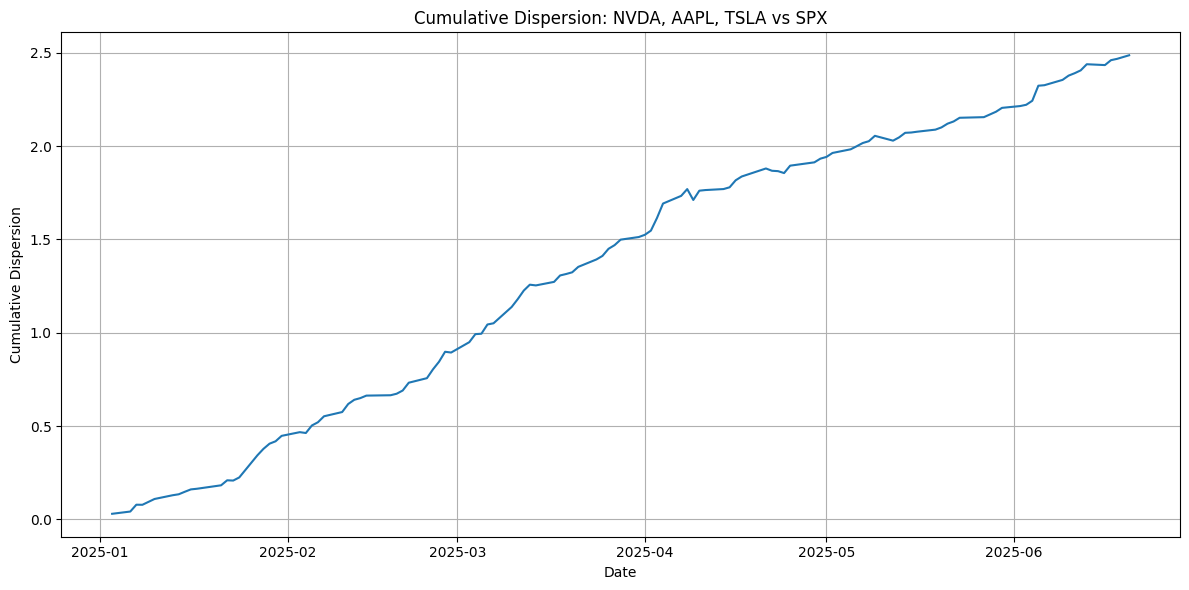

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define tickers
index_ticker = "^SPX"
stock_tickers = ["NVDA", "AAPL", "TSLA"]
tickers = [index_ticker] + stock_tickers

# Download historical data with 'Adj Close'
start_date = "2025-01-01"
end_date = "2025-12-31"
data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)

# Use 'Adj Close' column explicitly
adj_close = data["Adj Close"]

# Drop rows with missing data
adj_close.dropna(inplace=True)

# Calculate daily returns
returns = adj_close.pct_change().dropna()

# Calculate dispersion: std dev of stock returns minus index return
returns["Stock_STD"] = returns[stock_tickers].std(axis=1)
returns["Index_Return"] = returns[index_ticker]
returns["Dispersion"] = returns["Stock_STD"] - returns["Index_Return"]

# Cumulative dispersion
returns["Cumulative_Dispersion"] = returns["Dispersion"].cumsum()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=returns.index, y=returns["Cumulative_Dispersion"])
plt.title("Cumulative Dispersion: NVDA, AAPL, TSLA vs SPX")
plt.ylabel("Cumulative Dispersion")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()
